In [2]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [3]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai 'duckduckgo_search>=6.2'

In [4]:
pip install duckduckgo-search

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install fastcore

Note: you may need to restart the kernel to use updated packages.


In [6]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [7]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('bird photos', max_images=1)
urls[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

In [8]:
pip install fastdownload

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install fastai

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install matplotlib pillow

Note: you may need to restart the kernel to use updated packages.


In [14]:
from fastdownload import download_url

█

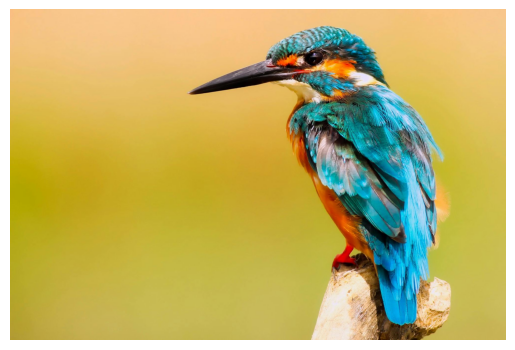

In [39]:
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

from PIL import Image
plt.imshow(im)
plt.axis('off')  # Hide axes for a cleaner look
plt.show()

In [13]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

NameError: name 'download_url' is not defined

In [1]:
searches = 'forest','bird'
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

NameError: name 'Path' is not defined

In [21]:
from fastai.vision.utils import verify_images
from fastai.vision.all import get_image_files
path = Path('bird_or_not')
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

12

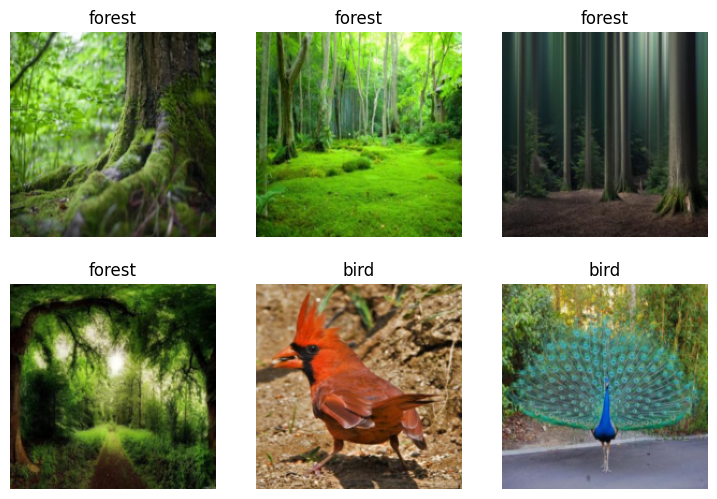

In [27]:
from fastai.vision.all import DataBlock, ImageBlock, CategoryBlock, RandomSplitter, parent_label, Resize
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [31]:
from fastai.vision.all import vision_learner, resnet18, error_rate
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Admin/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:05<00:00, 8.86MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.419638,0.016905,0.000000,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.030927,0.000174,0.000000,00:13
1,0.016067,0.000275,0.000000,00:15
2,0.010407,0.000254,0.000000,00:15


In [36]:
pip install PILImage

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PILImage (from versions: none)
ERROR: No matching distribution found for PILImage


In [37]:
from fastai.vision.all import PILImage
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000
